In [1]:
import pandas as pd


def load_feather(path):
    return pd.read_feather(path)
!pip install pyarrow
DATA_PATH = '/home/workspace/data/.train/.task149/train/train_b.feather'
data=load_feather(DATA_PATH)

  Using cached pyarrow-2.0.0-cp38-cp38-manylinux2014_x86_64.whl (17.8 MB)
  Using cached numpy-1.19.4-cp38-cp38-manylinux2010_x86_64.whl (14.5 MB)


In [2]:
data_1=data.sort_values(by=['승인일자'], axis=0)
#data_2=data_1.dropna()#
data_3=data_1.rename(columns = {"승인일자": "time", "매출금액": "sales"})
grouped=data_3.groupby(['time', 'a']).sales.sum()
data_a=grouped.to_frame()
import numpy as np
tmp=data_a.reset_index()
tmp

,time,a,sales
0,20190101,1,20642508
1,20190101,2,20271450
2,20190101,3,11529908
3,20190101,4,14568948
4,20190101,5,156559774
...,...,...,...
2885,20200731,1,24779888
2886,20200731,2,10147071
2887,20200731,3,25233072
2888,20200731,4,18157796


In [3]:
tmp.index=np.repeat(pd.date_range('2019-01-01',periods=578),5)
tmp 


,time,a,sales
2019-01-01,20190101,1,20642508
2019-01-01,20190101,2,20271450
2019-01-01,20190101,3,11529908
2019-01-01,20190101,4,14568948
2019-01-01,20190101,5,156559774
...,...,...,...
2020-07-31,20200731,1,24779888
2020-07-31,20200731,2,10147071
2020-07-31,20200731,3,25233072
2020-07-31,20200731,4,18157796


In [4]:
tmp1=tmp.drop('time',axis=1)

In [5]:
tmp1

,a,sales
2019-01-01,1,20642508
2019-01-01,2,20271450
2019-01-01,3,11529908
2019-01-01,4,14568948
2019-01-01,5,156559774
...,...,...
2020-07-31,1,24779888
2020-07-31,2,10147071
2020-07-31,3,25233072
2020-07-31,4,18157796


<AxesSubplot:>

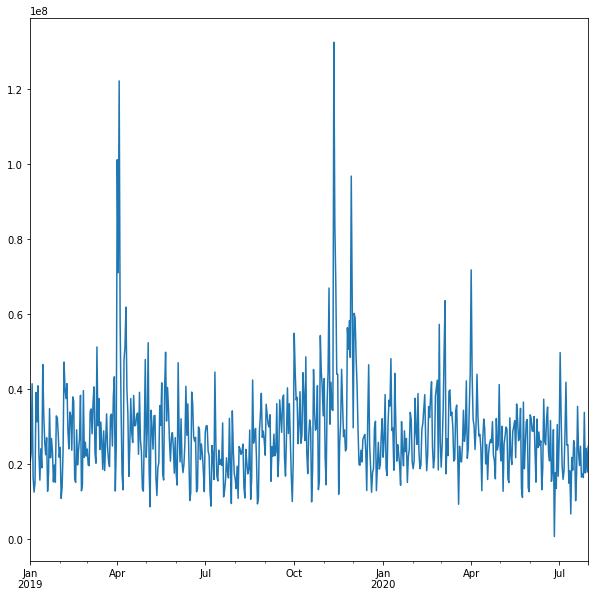

In [6]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==1]['sales'].plot()

<AxesSubplot:>

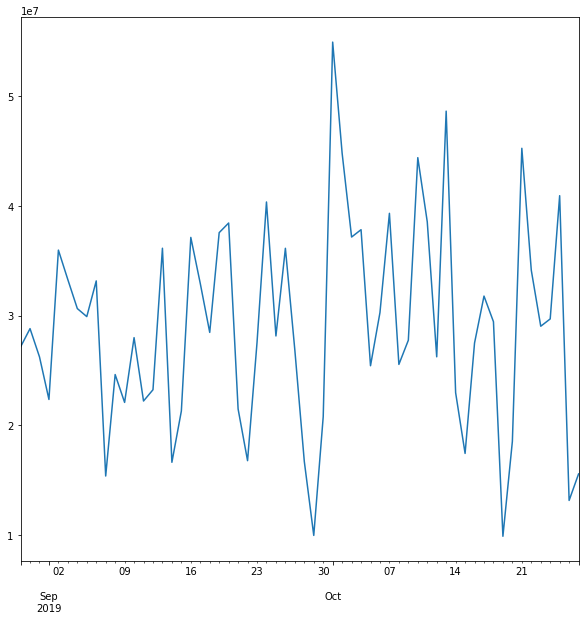

In [7]:
tmp1[tmp1.a==1]['sales'][240:300].plot()
#2019-04-01    47909823 2019-04-30     
#2019-04-02   21829963       2019-05-01     
#2019-04-03      52395897    2019-05-03   
#2019-11-11    66990488+10000000 2019-11-06       2019-11-29     
#2019-11-12      56990488
#2019-11-29      66990488   2019-11-06 
#2019-11-30    30639568 2019-11-07    
# 2020-06-26      6688942 2020-07-13     

In [8]:
tmp1[tmp1.a==1]['sales'][300:360]

2019-10-28     54312785
2019-10-29     44557021
2019-10-30     40434183
2019-10-31     32870136
2019-11-01     42845894
2019-11-02     21759152
2019-11-03     14458441
2019-11-04     36072371
2019-11-05     44467666
2019-11-06     66990488
2019-11-07     30639568
2019-11-08     41846278
2019-11-09     34624147
2019-11-10     34308435
2019-11-11    132582473
2019-11-12     84135356
2019-11-13     68253139
2019-11-14     43997564
2019-11-15     43957082
2019-11-16     11965001
2019-11-17     25676046
2019-11-18     30861452
2019-11-19     45302071
2019-11-20     36009884
2019-11-21     27310220
2019-11-22     29114426
2019-11-23     23504187
2019-11-24     24145838
2019-11-25     56410694
2019-11-26     50605146
2019-11-27     58258513
2019-11-28     48472655
2019-11-29     96868323
2019-11-30     61501807
2019-12-01     29667782
2019-12-02     60237808
2019-12-03     58950835
2019-12-04     48438876
2019-12-05     40887071
2019-12-06     29144418
2019-12-07     19901871
2019-12-08     1

In [9]:
a1=tmp1[tmp1.a==1]

In [10]:
a1.loc['2019-04-01']=[1,    47909823  ]
a1.loc['2019-04-02']=[1,   21829963 ]
a1.loc['2019-04-03 ']=[1,  52395897]
a1.loc['2019-11-11'] =    [1,76990488] 
a1.loc['2019-11-12']=     [1,56990488]
a1.loc['2019-11-29'] =    [1,66990488]
a1.loc['2019-11-30']=[1,30639568]
a1.loc['2020-06-26']    =  [1,6688942]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-10-765b042c8156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1.loc['2019-04-01']=[1,    47909823  ]
<ipython-input-10-765b042c8156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1.loc['2019-04-02']=[1,   21829963 ]
<ipython-input-10-765b042c8156>:3: Setting

<AxesSubplot:>

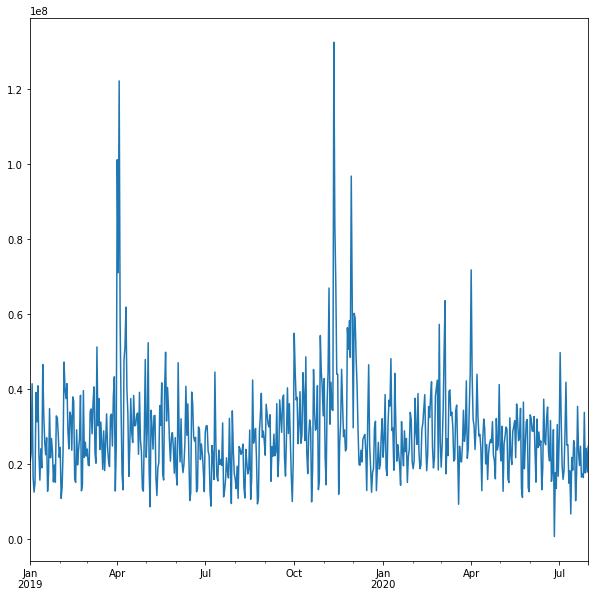

In [11]:
tmp1[tmp1.a==1]['sales'].plot()

<AxesSubplot:>

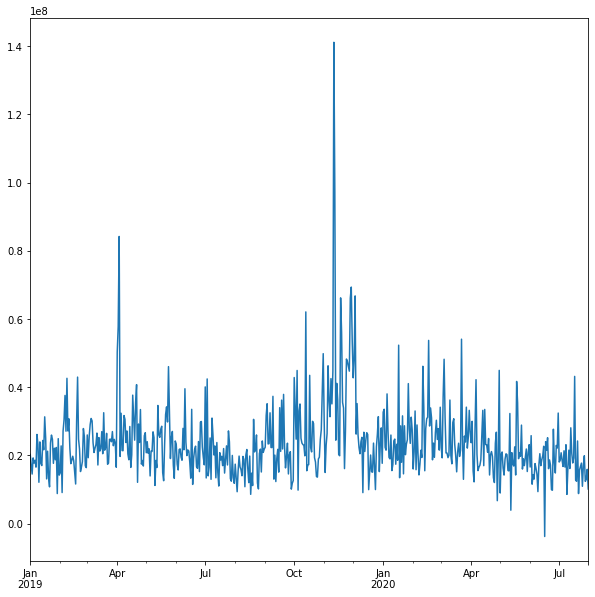

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==2]['sales'].plot()

<AxesSubplot:>

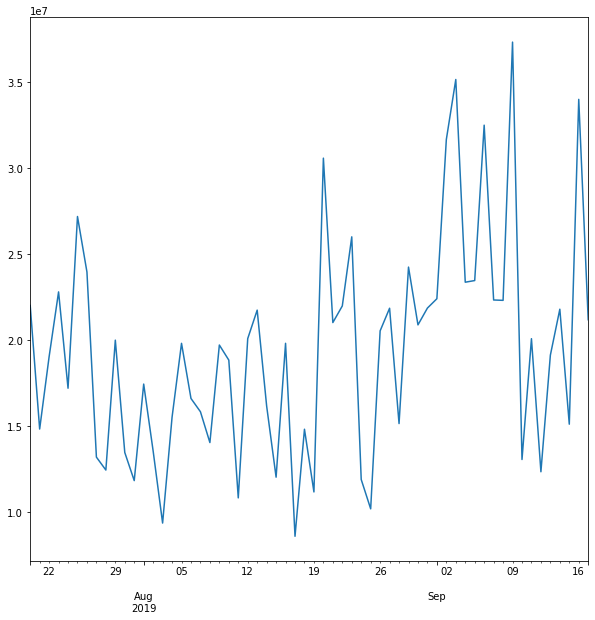

In [13]:
tmp1[tmp1.a==2]['sales'][200:260].plot()
#2019-04-01    34008000
#2019-04-02    39065000
#2019-04-03    56914000
#2019-11-11    66193951  2019-11-18     
#2019-11-12     56016055   2019-11-19     
#2020-06-16    np.mean([9382894,9960580])  2020-06-09      2020-06-23     

In [14]:
tmp1[tmp1.a==2]['sales'][200:260]

2019-07-20    22005354
2019-07-21    14817088
2019-07-22    19023991
2019-07-23    22794114
2019-07-24    17190970
2019-07-25    27179247
2019-07-26    23950383
2019-07-27    13183545
2019-07-28    12431466
2019-07-29    19986855
2019-07-30    13451978
2019-07-31    11817111
2019-08-01    17431943
2019-08-02    13535385
2019-08-03     9348013
2019-08-04    15504779
2019-08-05    19801907
2019-08-06    16595095
2019-08-07    15822962
2019-08-08    14030814
2019-08-09    19703602
2019-08-10    18826607
2019-08-11    10812275
2019-08-12    20077092
2019-08-13    21733448
2019-08-14    16157090
2019-08-15    12016900
2019-08-16    19803198
2019-08-17     8578627
2019-08-18    14805716
2019-08-19    11158497
2019-08-20    30573312
2019-08-21    21009725
2019-08-22    21976425
2019-08-23    25996387
2019-08-24    11881891
2019-08-25    10175839
2019-08-26    20528145
2019-08-27    21843849
2019-08-28    15134704
2019-08-29    24236724
2019-08-30    20875372
2019-08-31    21852748
2019-09-01 

In [15]:
tmp1[tmp1.a==2]['sales'][500:560]

2020-05-15    16882284
2020-05-16    22501372
2020-05-17    14254887
2020-05-18    41687230
2020-05-19    35398886
2020-05-20    19043118
2020-05-21    20804825
2020-05-22    19734098
2020-05-23    28882349
2020-05-24    15997436
2020-05-25    19030768
2020-05-26    17003621
2020-05-27    19373815
2020-05-28    21879002
2020-05-29    15276031
2020-05-30    20949855
2020-05-31    23147056
2020-06-01    16591373
2020-06-02    25790215
2020-06-03    11556704
2020-06-04    14371201
2020-06-05    13034803
2020-06-06    17599449
2020-06-07    16273515
2020-06-08    14510685
2020-06-09     9382894
2020-06-10    17231660
2020-06-11    20499373
2020-06-12    16982552
2020-06-13    18703955
2020-06-14    19881996
2020-06-15    22689526
2020-06-16    -3780325
2020-06-17    24017170
2020-06-18    21517446
2020-06-19    25193590
2020-06-20    16107429
2020-06-21    18675854
2020-06-22    17144790
2020-06-23     9960580
2020-06-24     9777855
2020-06-25    27684659
2020-06-26    18036611
2020-06-27 

In [16]:
a2=tmp1[tmp1.a==2]

In [17]:
a2.loc['2019-04-01']=   [2,34008000]
a2.loc['2019-04-02'] =   [2,39065000]
a2.loc['2019-04-03']  =[2,56914000]
a2.loc['2019-11-11']   = [2,66193951]  
a2.loc['2019-11-12']   =[2,56016055] 
a2.loc['2020-06-16']=    [2,np.mean([9382894,9960580])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-17-bf585663a5c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2.loc['2019-04-01']=   [2,34008000]
<ipython-input-17-bf585663a5c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2.loc['2019-04-02'] =   [2,39065000]
<ipython-input-17-bf585663a5c6>:3: SettingWit

<AxesSubplot:>

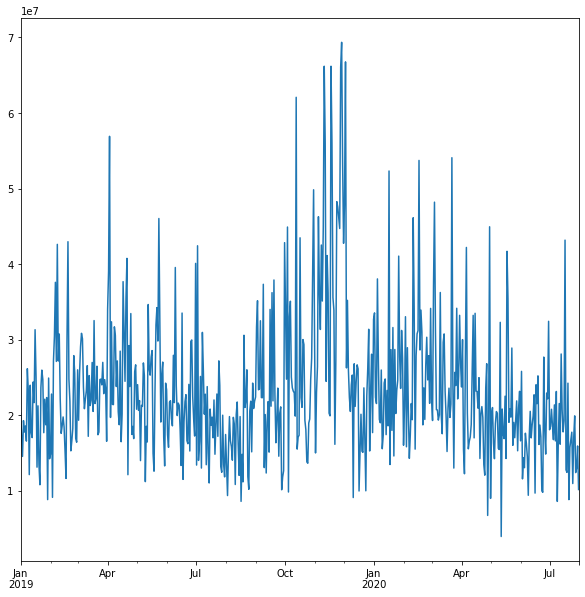

In [18]:
a2['sales'].plot()

<AxesSubplot:>

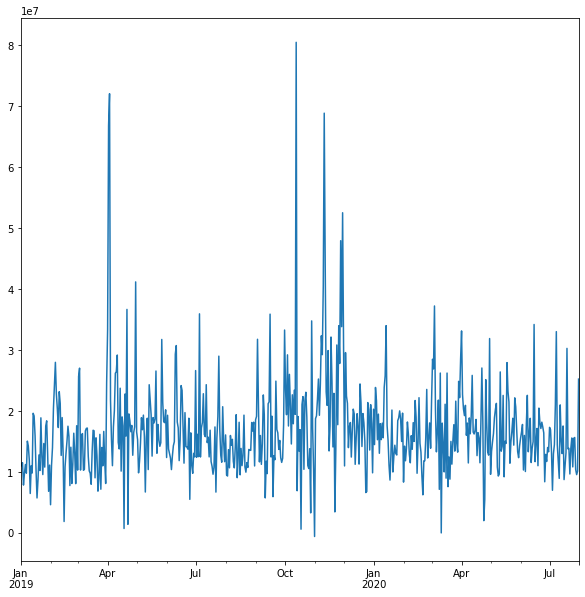

In [19]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==3]['sales'].plot()

<AxesSubplot:>

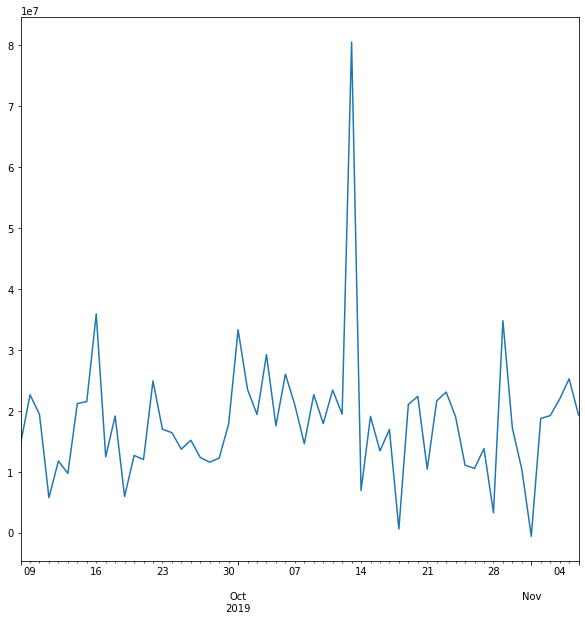

In [20]:
tmp1[tmp1.a==3]['sales'][250:310].plot()

#2019-03-31    9656665
#2019-04-01    13352819
#2019-04-02    25829422
#2019-04-03   32926750.5= np.mean([29183899,36669602])  2019-04-11     2019-04-21    
#2019-10-13    np.mean([23412255 ,19091809])   2019-10-11     2019-10-15 
#2019-11-11    52532513 2019-11-30   

In [21]:
tmp1[tmp1.a==3]['sales'][280:340]

2019-10-08    14588783
2019-10-09    22658993
2019-10-10    17906952
2019-10-11    23412255
2019-10-12    19452809
2019-10-13    80499201
2019-10-14     6914626
2019-10-15    19091809
2019-10-16    13418718
2019-10-17    16938641
2019-10-18      608736
2019-10-19    21052395
2019-10-20    22363410
2019-10-21    10430246
2019-10-22    21625112
2019-10-23    23077601
2019-10-24    19001413
2019-10-25    11061112
2019-10-26    10559133
2019-10-27    13794673
2019-10-28     3282875
2019-10-29    34783754
2019-10-30    17161179
2019-10-31    10392158
2019-11-01     -590615
2019-11-02    18749283
2019-11-03    19207014
2019-11-04    21927673
2019-11-05    25247201
2019-11-06    19297604
2019-11-07    24474420
2019-11-08    32342588
2019-11-09    29243483
2019-11-10    40466435
2019-11-11    68873456
2019-11-12    44006903
2019-11-13    23143319
2019-11-14    20924744
2019-11-15    29914675
2019-11-16    13444972
2019-11-17    17513145
2019-11-18    32140966
2019-11-19    24819394
2019-11-20 

In [22]:
a3=tmp1[tmp1.a==3]

In [23]:
a3.loc['2019-03-31']=[3,    9656665]
a3.loc['2019-04-01']=    [3,13352819]
a3.loc['2019-04-02']    =[3,25829422]
a3.loc['2019-04-03']   =[3,32926750.5]   
a3.loc['2019-10-13']    =[3,np.mean([23412255 ,19091809])]
a3.loc['2019-11-11']    =[3,52532513]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-23-0fe44eaf0aa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3.loc['2019-03-31']=[3,    9656665]
<ipython-input-23-0fe44eaf0aa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3.loc['2019-04-01']=    [3,13352819]
<ipython-input-23-0fe44eaf0aa0>:3: SettingWit

<AxesSubplot:>

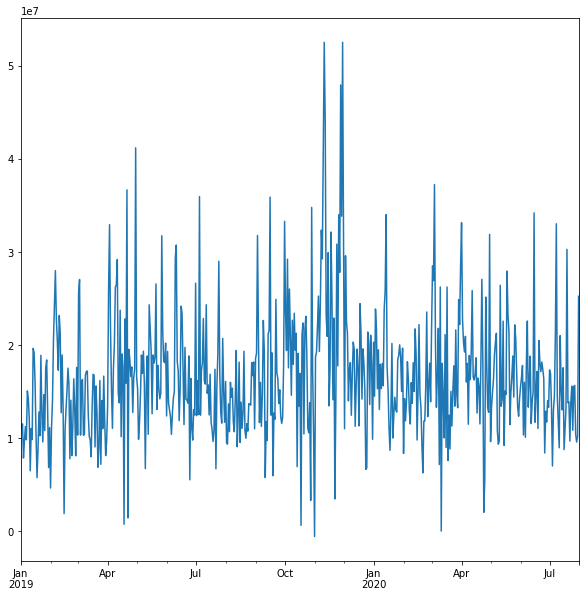

In [24]:
a3['sales'].plot()

In [25]:
a3['sales'][520:]

2020-06-04    10318558.0
2020-06-05    15989218.0
2020-06-06    10073032.0
2020-06-07    17835002.0
2020-06-08    22571711.0
2020-06-09    13312454.0
2020-06-10    16244526.0
2020-06-11    18800553.0
2020-06-12    11544570.0
2020-06-13    13870194.0
2020-06-14    14981361.0
2020-06-15    34196691.0
2020-06-16    11687287.0
2020-06-17    14816762.0
2020-06-18    17141517.0
2020-06-19    11022502.0
2020-06-20    20475731.0
2020-06-21    18104885.0
2020-06-22    17130912.0
2020-06-23    18168089.0
2020-06-24    17365028.0
2020-06-25    16408727.0
2020-06-26     8385828.0
2020-06-27    12885101.0
2020-06-28    11715269.0
2020-06-29    14013476.0
2020-06-30    13304069.0
2020-07-01    17317125.0
2020-07-02    16923809.0
2020-07-03    13344675.0
2020-07-04     6988463.0
2020-07-05    12985150.0
2020-07-06    14492670.0
2020-07-07    21047502.0
2020-07-08    33026136.0
2020-07-09    14455874.0
2020-07-10    11712559.0
2020-07-11     8945624.0
2020-07-12    20999240.0
2020-07-13    15201156.0


<AxesSubplot:>

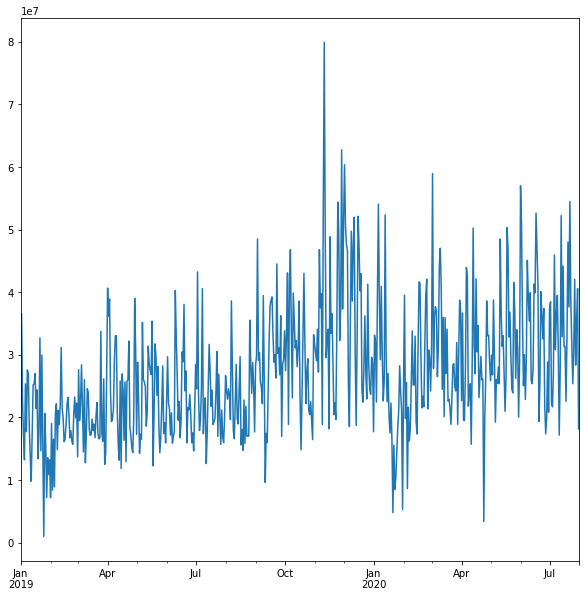

In [26]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==4]['sales'].plot()

<AxesSubplot:>

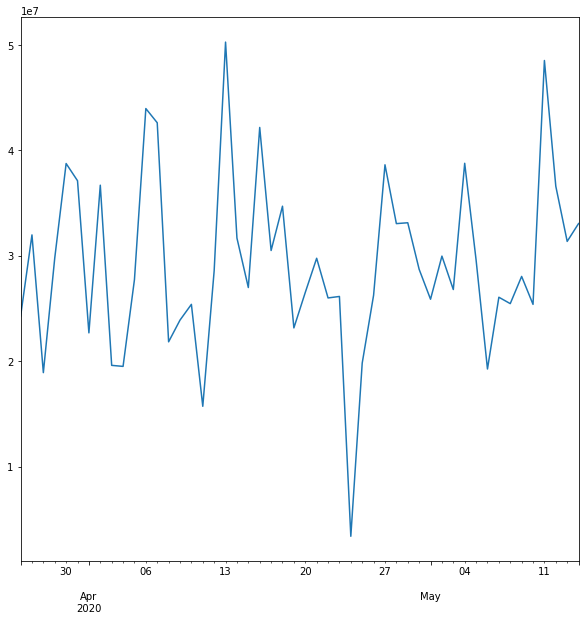

In [27]:
tmp1[tmp1.a==4]['sales'][450:500].plot()
#2019-01-25      np.mean([17296030,7238467]) 2019-01-13       2019-01-28     
#2019-11-11    np.mean([46812271,48863668])   2019-11-06      2019-11-17    
#2020-04-24    np.mean([15711505, 19250062]) 2020-04-11      2020-05-06   

In [28]:
tmp1[tmp1.a==4]['sales'][450:500]

2020-03-26    24238557
2020-03-27    31970285
2020-03-28    18905032
2020-03-29    29768801
2020-03-30    38741333
2020-03-31    37109811
2020-04-01    22677993
2020-04-02    36686061
2020-04-03    19595565
2020-04-04    19497573
2020-04-05    27730816
2020-04-06    43955787
2020-04-07    42609225
2020-04-08    21828448
2020-04-09    23888717
2020-04-10    25382603
2020-04-11    15711505
2020-04-12    28574276
2020-04-13    50258640
2020-04-14    31671415
2020-04-15    26978712
2020-04-16    42163376
2020-04-17    30490883
2020-04-18    34692962
2020-04-19    23148366
2020-04-20    26510995
2020-04-21    29755105
2020-04-22    25990790
2020-04-23    26131778
2020-04-24     3381372
2020-04-25    19808356
2020-04-26    26249649
2020-04-27    38621530
2020-04-28    33041094
2020-04-29    33122956
2020-04-30    28706101
2020-05-01    25868178
2020-05-02    29959044
2020-05-03    26788796
2020-05-04    38763933
2020-05-05    29594115
2020-05-06    19250062
2020-05-07    26058566
2020-05-08 

In [29]:
a4=tmp1[tmp1.a==4]

In [30]:
a4.loc['2019-11-11']    =[4,np.mean([46812271,48863668])]
a4.loc['2019-01-25']     =[4,np.mean([17296030,7238467])]
a4.loc['2020-04-24']=    [4,np.mean([15711505, 19250062]) ]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

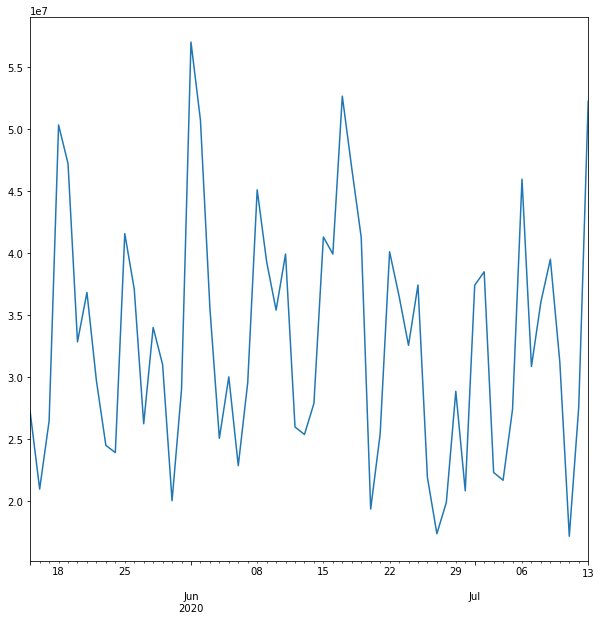

In [31]:
a4['sales'][500:560].plot()

In [32]:
a4['sales'][420:480]

2020-02-25    42096419.0
2020-02-26    21359674.0
2020-02-27    30778328.0
2020-02-28    29557621.0
2020-02-29    24214719.0
2020-03-01    31065831.0
2020-03-02    58959893.0
2020-03-03    27859468.0
2020-03-04    36097556.0
2020-03-05    37690748.0
2020-03-06    36908698.0
2020-03-07    26512221.0
2020-03-08    31344732.0
2020-03-09    44144887.0
2020-03-10    47039075.0
2020-03-11    40647612.0
2020-03-12    24493426.0
2020-03-13    35990324.0
2020-03-14    20116928.0
2020-03-15    35959689.0
2020-03-16    27006579.0
2020-03-17    34105365.0
2020-03-18    22654673.0
2020-03-19    22888168.0
2020-03-20    21644833.0
2020-03-21    18897657.0
2020-03-22    22889671.0
2020-03-23    28356661.0
2020-03-24    28588922.0
2020-03-25    24942029.0
2020-03-26    24238557.0
2020-03-27    31970285.0
2020-03-28    18905032.0
2020-03-29    29768801.0
2020-03-30    38741333.0
2020-03-31    37109811.0
2020-04-01    22677993.0
2020-04-02    36686061.0
2020-04-03    19595565.0
2020-04-04    19497573.0


<AxesSubplot:>

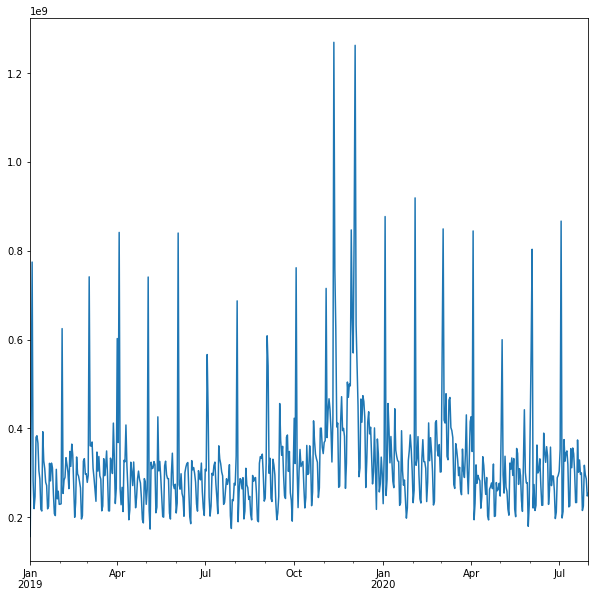

In [33]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==5]['sales'].plot()

<AxesSubplot:>

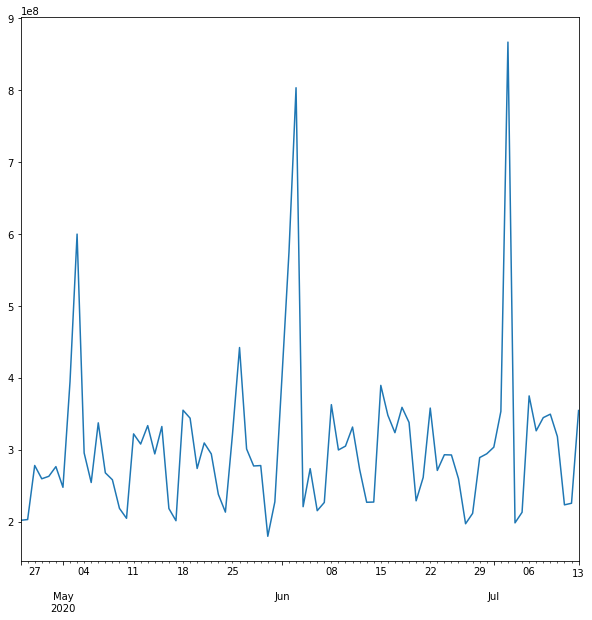

In [34]:
tmp1[tmp1.a==5]['sales'][480:560].plot()
#2019-11-11   np.mean([ 715042624,471269708])   2019-11-03       2019-11-19     
#2019-11-12     np.mean([466627803,394854196])   2019-11-06       2019-11-20     
#2019-11-13     np.mean([324242240,264875015]) 2019-11-09        2019-11-23     
#2019-12-03    np.mean([ 844473121,466104884])   2019-12-02      2019-12-09  
#2019-11-29   np.mean([504168837.0,466104884.0])     2019-11-25      2019-12-09    

In [35]:
tmp1[tmp1.a==5]['sales'][300:360]

2019-10-28     400229815
2019-10-29     400469655
2019-10-30     357252404
2019-10-31     343185575
2019-11-01     368271228
2019-11-02     372276479
2019-11-03     715042624
2019-11-04     379083097
2019-11-05     438869239
2019-11-06     466627803
2019-11-07     443066749
2019-11-08     398272991
2019-11-09     324242240
2019-11-10     421911194
2019-11-11    1269016725
2019-11-12     758895293
2019-11-13     625573625
2019-11-14     403024706
2019-11-15     411772215
2019-11-16     267271488
2019-11-17     269905923
2019-11-18     415430840
2019-11-19     471269708
2019-11-20     394854196
2019-11-21     399969262
2019-11-22     381920677
2019-11-23     264875015
2019-11-24     321553379
2019-11-25     504168837
2019-11-26     469832700
2019-11-27     499823278
2019-11-28     495661007
2019-11-29     846666011
2019-11-30     648865015
2019-12-01     569716138
2019-12-02     844473121
2019-12-03    1262202361
2019-12-04     632294434
2019-12-05     544983489
2019-12-06     451233915


In [36]:
a5=tmp1[tmp1.a==5]

In [37]:
a5.loc['2019-11-11']   =[5,np.mean([ 715042624,471269708])]
a5.loc['2019-11-12']    =[5,np.mean([466627803,394854196])]
a5.loc['2019-11-13']    = [5,np.mean([324242240,264875015])]
a5.loc['2019-12-03']    =[5,np.mean([ 844473121,466104884])] 
a5.loc['2019-11-29']   =[5,np.mean([504168837.0,466104884.0])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

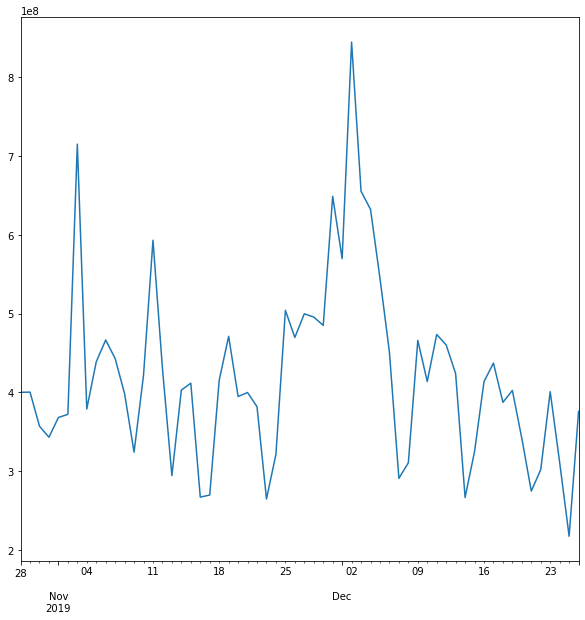

In [38]:
a5['sales'][300:360].plot()

In [39]:
a5['sales'][300:360]

2019-10-28    400229815.0
2019-10-29    400469655.0
2019-10-30    357252404.0
2019-10-31    343185575.0
2019-11-01    368271228.0
2019-11-02    372276479.0
2019-11-03    715042624.0
2019-11-04    379083097.0
2019-11-05    438869239.0
2019-11-06    466627803.0
2019-11-07    443066749.0
2019-11-08    398272991.0
2019-11-09    324242240.0
2019-11-10    421911194.0
2019-11-11    593156166.0
2019-11-12    430740999.5
2019-11-13    294558627.5
2019-11-14    403024706.0
2019-11-15    411772215.0
2019-11-16    267271488.0
2019-11-17    269905923.0
2019-11-18    415430840.0
2019-11-19    471269708.0
2019-11-20    394854196.0
2019-11-21    399969262.0
2019-11-22    381920677.0
2019-11-23    264875015.0
2019-11-24    321553379.0
2019-11-25    504168837.0
2019-11-26    469832700.0
2019-11-27    499823278.0
2019-11-28    495661007.0
2019-11-29    485136860.5
2019-11-30    648865015.0
2019-12-01    569716138.0
2019-12-02    844473121.0
2019-12-03    655289002.5
2019-12-04    632294434.0
2019-12-05  

<AxesSubplot:>

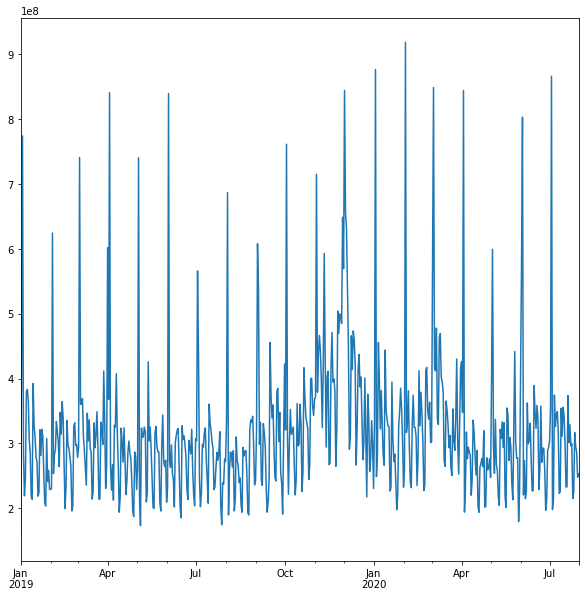

In [40]:
a5['sales'].plot()

In [41]:
a1.to_csv("b_business_time1_edit.csv")
a2.to_csv("b_business_time2_edit.csv")
a3.to_csv("b_business_time3_edit.csv")
a4.to_csv("b_business_time4_edit.csv")
a5.to_csv("b_business_time5_edit.csv")

<AxesSubplot:>

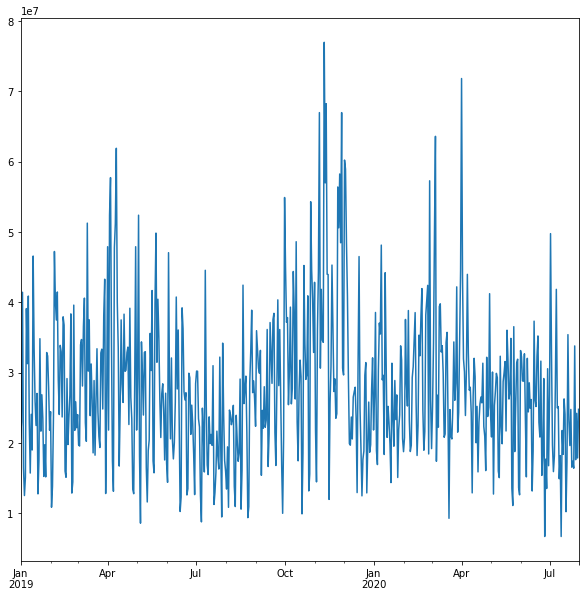

In [42]:
a1['sales'].plot()

<AxesSubplot:>

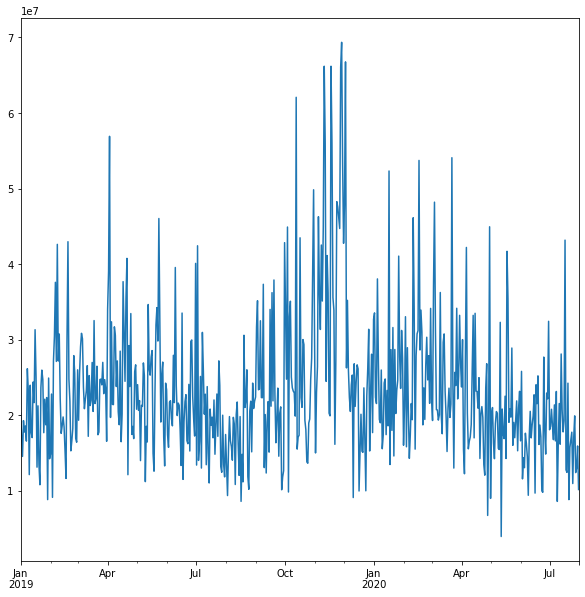

In [43]:
a2['sales'].plot()

<AxesSubplot:>

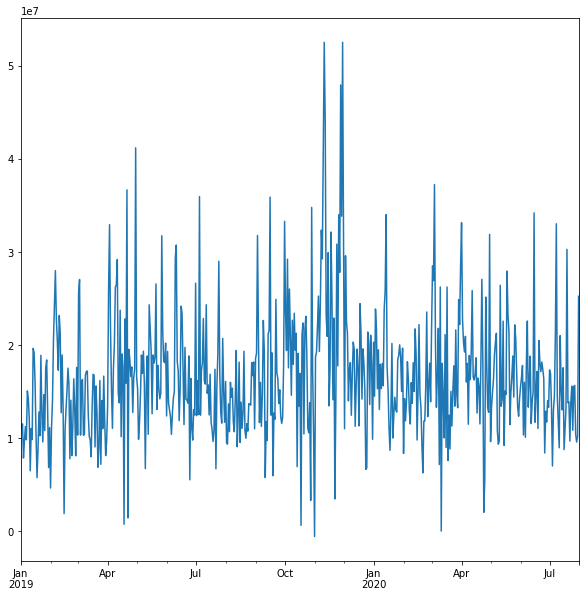

In [44]:
a3['sales'].plot()

<AxesSubplot:>

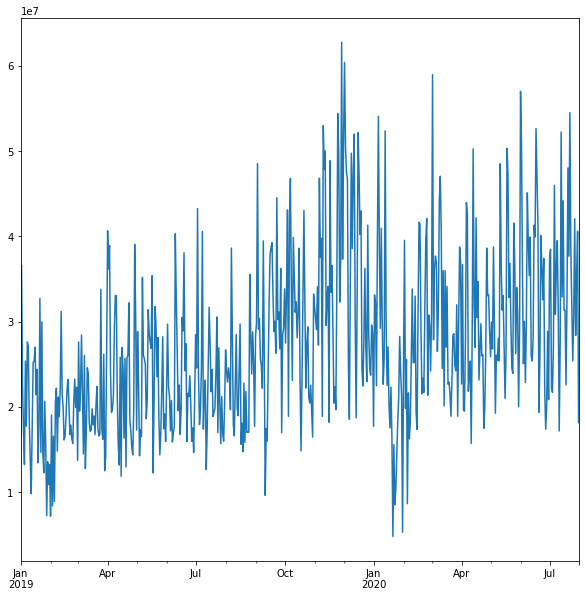

In [45]:
a4['sales'].plot()

<AxesSubplot:>

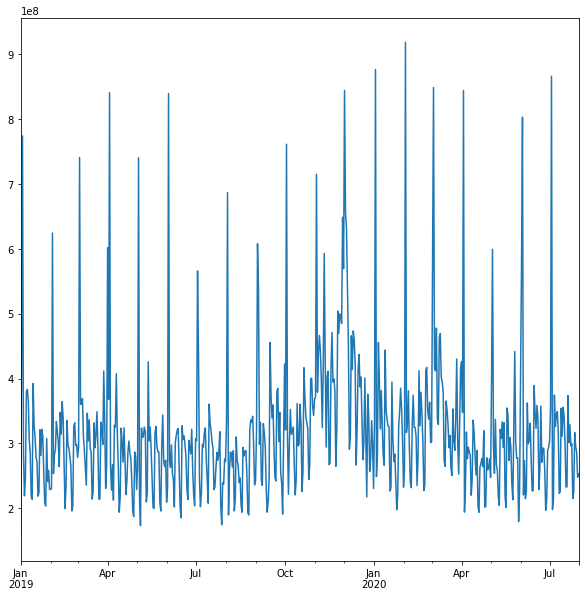

In [46]:
a5['sales'].plot()